Supplementary Figures
==================

This section provides additional supplementary figures that are largely in parallel with those presented in the main article, apart for different publication years. Supplementary Figures 1 and 2 present the top 100 universities in total open access, open access (gold) publishing and repository-mediated (green) open access, for the publication years 2016 and 2018, respectively. These are produced analogously to Figure 1 of the main text.

Supplementary Figures 3 to 5 are figures based on the complete list of universities (i.e., without filtering on margin of error). These represent the open access performances across different countries for the years 2016, 2017 and 2018. In parallel, Supplementary Figures 6 to 8 gives the overviews as per region.

Supplementary Figure 9 is an extended version of Figure 3 of the main text and presents corresponsing time-stamped figures from 2007 to 2018. Supplementary Figure 10 provides additional information to Figure 4 of the main text.

In [1]:
# General incantations and imports
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

from analysis import charts

plt.style.use('seaborn-white')
sns.set_context('paper')

In [2]:
full = pd.read_csv('https://zenodo.org/record/3693222/files/institutional_oa_evaluation_2020_full_paper_dataset_2020_02_12.csv?download=1')

In [3]:
named = pd.read_csv('https://zenodo.org/record/3693222/files/institutional_oa_evaluation_2020_named_unis_dataset_2020_02_12.csv?download=1')

In [4]:
## Helper functions ##

# Data cleanup required, mainly on country names #
def clean_geo_names(df):
    country_clean = { "country" : {
        "United Kingdom of Great Britain and Northern Ireland" : "United Kingdom",
        "Iran (Islamic Republic of)" : "Iran",
        "Korea, Republic of" : "South Korea",
        "Taiwan, Province of China" : "Taiwan"
                              }
                    }
    df.replace(to_replace = country_clean, inplace=True)

    df.loc[df.country.isin(['Canada', 'United States of America']), 'region'] = 'North America'
    df.replace('Americas', 'Latin America', inplace=True)
    return df

# Creating nice column names for graphing
def nice_column_names(df):
    cols = [
        ('Open Access (%)', 'percent_oa'),
        ('Total Green OA (%)', 'percent_green'),
        ('Total Gold OA (%)', 'percent_gold'),
        ('Gold DOAJ (%)', 'percent_gold_just_doaj'),
        ('Green in Institutional Repository (%)', 'percent_in_home_repo'),
        ('Hybrid OA (%)', 'percent_hybrid'),
        ('Total Publications', 'total'),
        ('Change in Open Access (%)', 'total_oa_pc_change'),
        ('Change in Green OA (%)', 'green_pc_change'),
        ('Change in Gold OA (%)', 'gold_pc_change'),
        ('Change in Total Publications (%)', 'total_pc_change'),        
        ('Year of Publication', 'published_year'),
        ('University Name', 'name'),
        ('Region', 'region'),
        ('Country', 'country'),
            ]
    for col in cols:
        if col[1] in df.columns.values:
            df[col[0]] = df[col[1]]

    return df

# Function for creating percent_changes year on year
def calculate_pc_change(df, columns, 
              id_column='grid_id', 
              year_column='published_year',
              column_name_add='_pc_change'):
    df = df.sort_values(year_column, ascending=True)
    for column in columns:
        new_column_name = column + column_name_add
        df[new_column_name] = list(df.groupby(id_column)[column].pct_change()*100)   
    return df

# Function for calculating confidence intervals
def calculate_confidence_interval(df, columns,
                                  total_column='total',
                                  column_name_add='_err'):
    for column in columns:
        new_column_name = column + column_name_add
        df[new_column_name] = 100*3.43*(                                            df[column] / 100 *
                                                   (
                                                    1 - df[column] / 100
                                                   ) /
                                            df[total_column]
                                                )**(.5)
    return df

In [5]:
# Do the data cleanup and a few calculations for graphing
clean_geo_names(full)
clean_geo_names(named)
full = calculate_confidence_interval(full,
                                 ['percent_gold', 
                                  'percent_green', 
                                  'percent_oa'])
named = calculate_pc_change(named, 
              ['gold', 
               'green', 
               'total_oa', 
               'total'])
named = calculate_confidence_interval(named,
                                 ['percent_gold', 
                                  'percent_green', 
                                  'percent_oa'])
full = nice_column_names(full)
named = nice_column_names(named)

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

#### Supplementary Figure 1: Top 100 universities in terms of performance in Total OA, Gold OA and Green OA for 2016

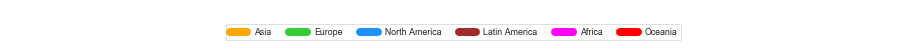

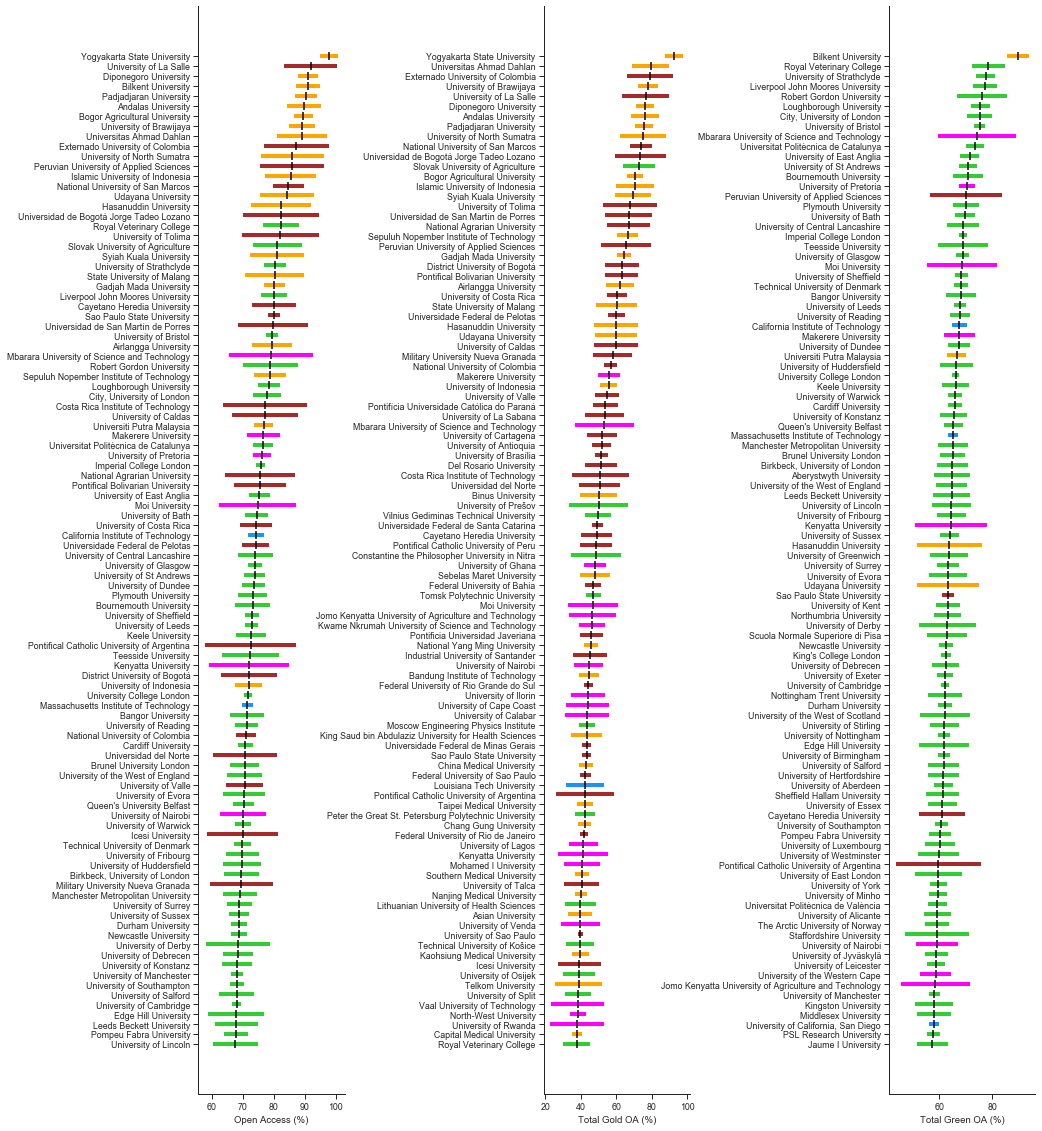

In [6]:
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='orange', lw=8, label='Asia'),
                   Line2D([0], [0], color='limegreen', lw=8, label='Europe'),
                   Line2D([0], [0], color='dodgerblue', lw=8, label='North America'),
                   Line2D([0], [0], color='brown', lw=8, label='Latin America'),
                   Line2D([0], [0], color='magenta', lw=8, label='Africa'),
                   Line2D([0], [0], color='red', lw=8, label='Oceania')]
# Create the figure
fig, ax = plt.subplots(figsize=(16,0.7))
ax.legend(handles=legend_elements, loc='lower center', frameon=True, ncol=6)
plt.axis('off')
plt.show()
params = [
            {
            'chart_class': charts.ConfidenceIntervalRank,
            'rankcol': 'Open Access (%)',
            'errorcol': 'percent_oa_err',
            'filter_name': 'published_year',
            'filter_value': 2016
            },
            {
            'chart_class': charts.ConfidenceIntervalRank,
            'rankcol': 'Total Gold OA (%)',
            'errorcol': 'percent_gold_err',
            'filter_name': 'published_year',
            'filter_value': 2016
            },
            {
            'chart_class': charts.ConfidenceIntervalRank,
            'rankcol': 'Total Green OA (%)',
            'errorcol': 'percent_green_err',
            'filter_name': 'published_year',
            'filter_value': 2016
            }
]
figures1 = charts.Layout(named[(named.percent_green_err<17)&
                              (named.total*named.percent_green/100>5)&
                              ((named.total*(1-named.percent_green/100)>5))&
                              (named.percent_gold_err<17)&
                              (named.total*named.percent_gold/100>5)&
                              ((named.total*(1-named.percent_gold/100)>5))&
                              (named.percent_oa_err<17)&
                              (named.total*named.percent_oa/100>5)&
                              ((named.total*(1-named.percent_oa/100)>5))], params)
figures1.process_data()
figures1.plot(wspace=1.36);

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

#### Supplementary Figure 2: Top 100 universities in terms of performance in Total OA, Gold OA and Green OA for 2018

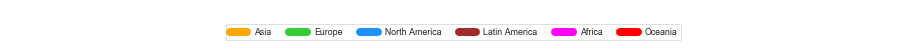

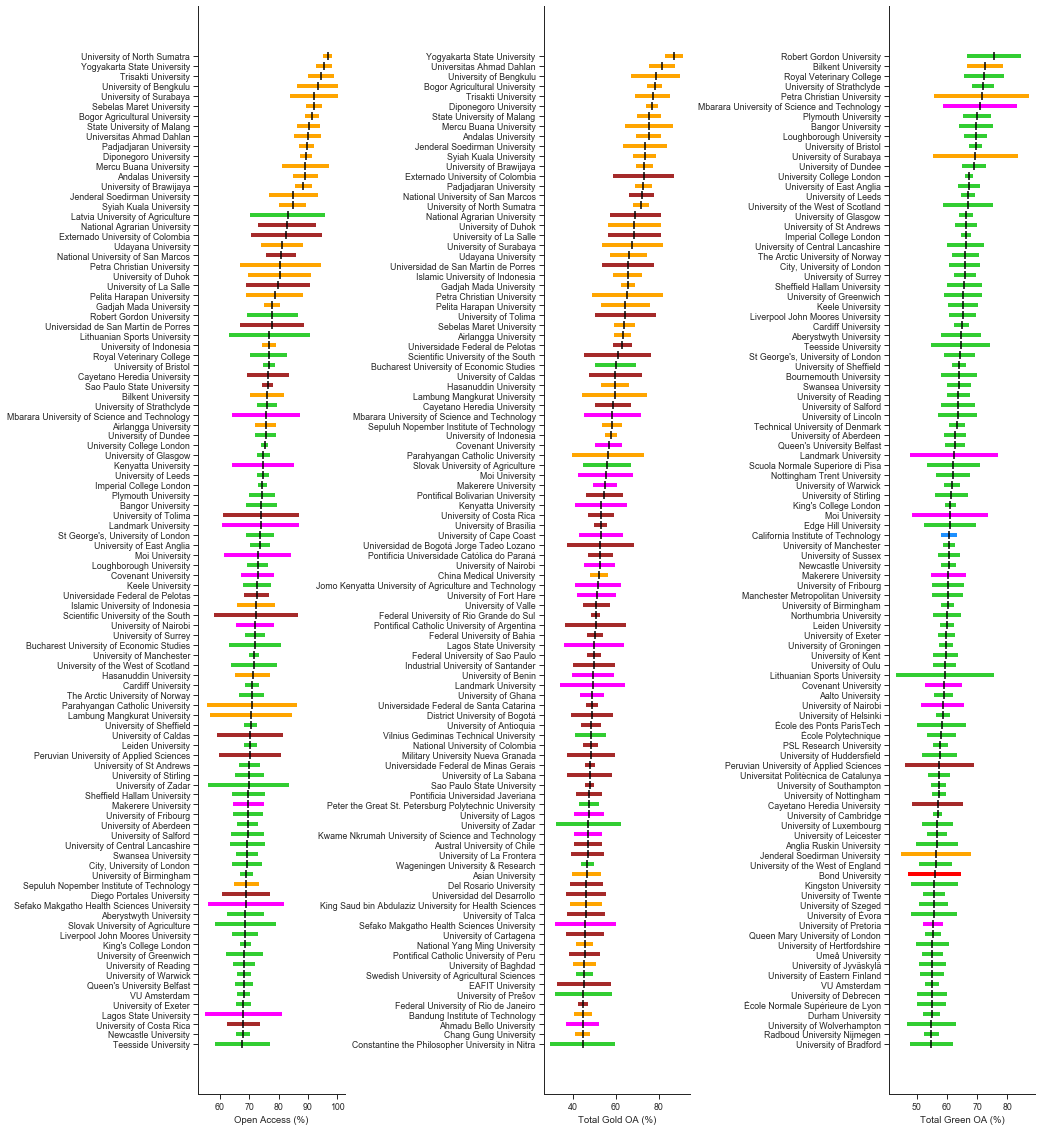

In [7]:
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='orange', lw=8, label='Asia'),
                   Line2D([0], [0], color='limegreen', lw=8, label='Europe'),
                   Line2D([0], [0], color='dodgerblue', lw=8, label='North America'),
                   Line2D([0], [0], color='brown', lw=8, label='Latin America'),
                   Line2D([0], [0], color='magenta', lw=8, label='Africa'),
                   Line2D([0], [0], color='red', lw=8, label='Oceania')]
# Create the figure
fig, ax = plt.subplots(figsize=(16,0.7))
ax.legend(handles=legend_elements, loc='lower center', frameon=True, ncol=6)
plt.axis('off')
plt.show()
params = [
            {
            'chart_class': charts.ConfidenceIntervalRank,
            'rankcol': 'Open Access (%)',
            'errorcol': 'percent_oa_err',
            'filter_name': 'published_year',
            'filter_value': 2018
            },
            {
            'chart_class': charts.ConfidenceIntervalRank,
            'rankcol': 'Total Gold OA (%)',
            'errorcol': 'percent_gold_err',
            'filter_name': 'published_year',
            'filter_value': 2018
            },
            {
            'chart_class': charts.ConfidenceIntervalRank,
            'rankcol': 'Total Green OA (%)',
            'errorcol': 'percent_green_err',
            'filter_name': 'published_year',
            'filter_value': 2018
            }
]
figures2 = charts.Layout(named[(named.percent_green_err<17)&
                              (named.total*named.percent_green/100>5)&
                              ((named.total*(1-named.percent_green/100)>5))&
                              (named.percent_gold_err<17)&
                              (named.total*named.percent_gold/100>5)&
                              ((named.total*(1-named.percent_gold/100)>5))&
                              (named.percent_oa_err<17)&
                              (named.total*named.percent_oa/100>5)&
                              ((named.total*(1-named.percent_oa/100)>5))], params)
figures2.process_data()
figures2.plot(wspace=1.36);

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

#### Supplementary Figure 3: Percentages of institutional Total OA, Gold OA and Green OA (left to right) grouped by countries for 2017

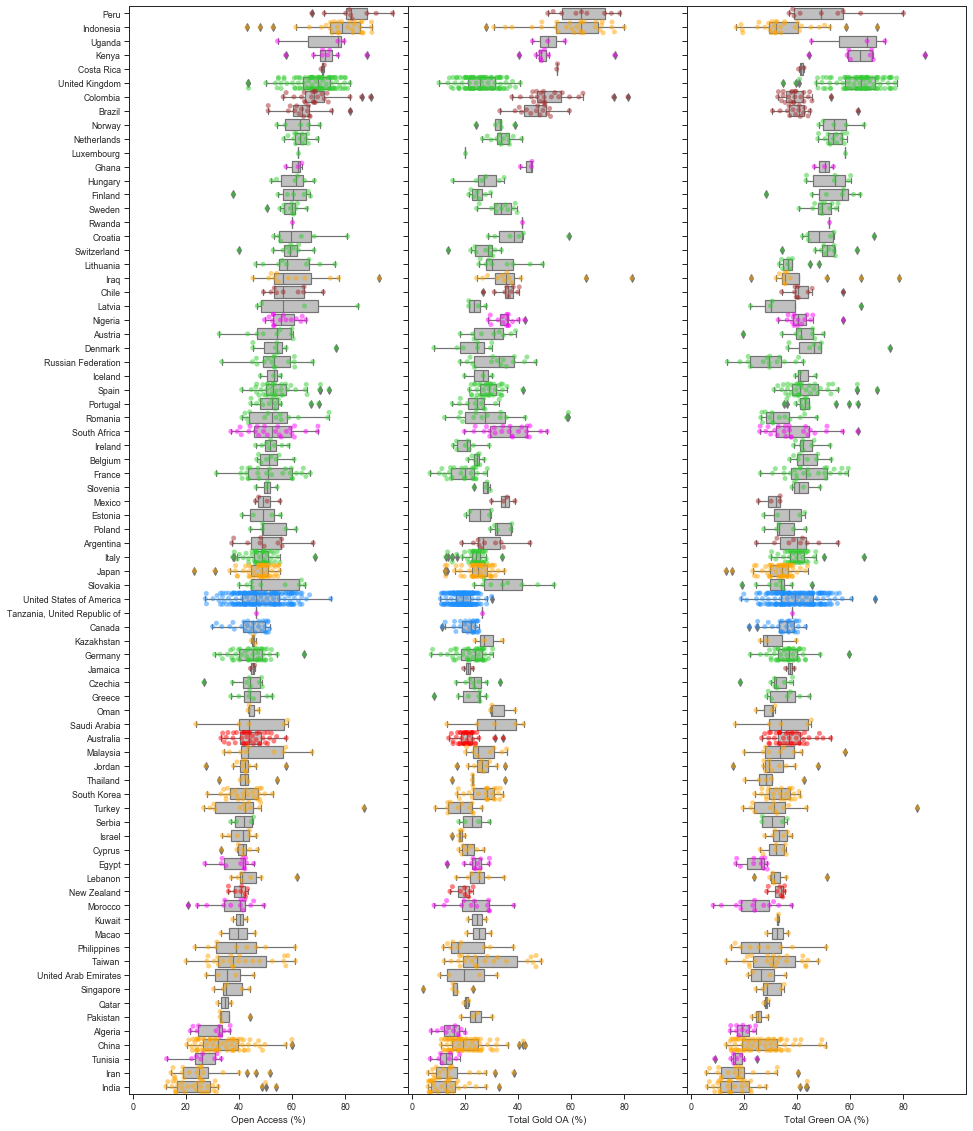

In [8]:
figures3 = charts.BoxScatter(full, 2017, 'country', ['Open Access (%)',
                                                         'Total Gold OA (%)',
                                                         'Total Green OA (%)'])
figures3.process_data()
figures3.plot();

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

#### Supplementary Figure 4: Percentages of institutional Total OA, Gold OA and Green OA (left to right) grouped by countries for 2016

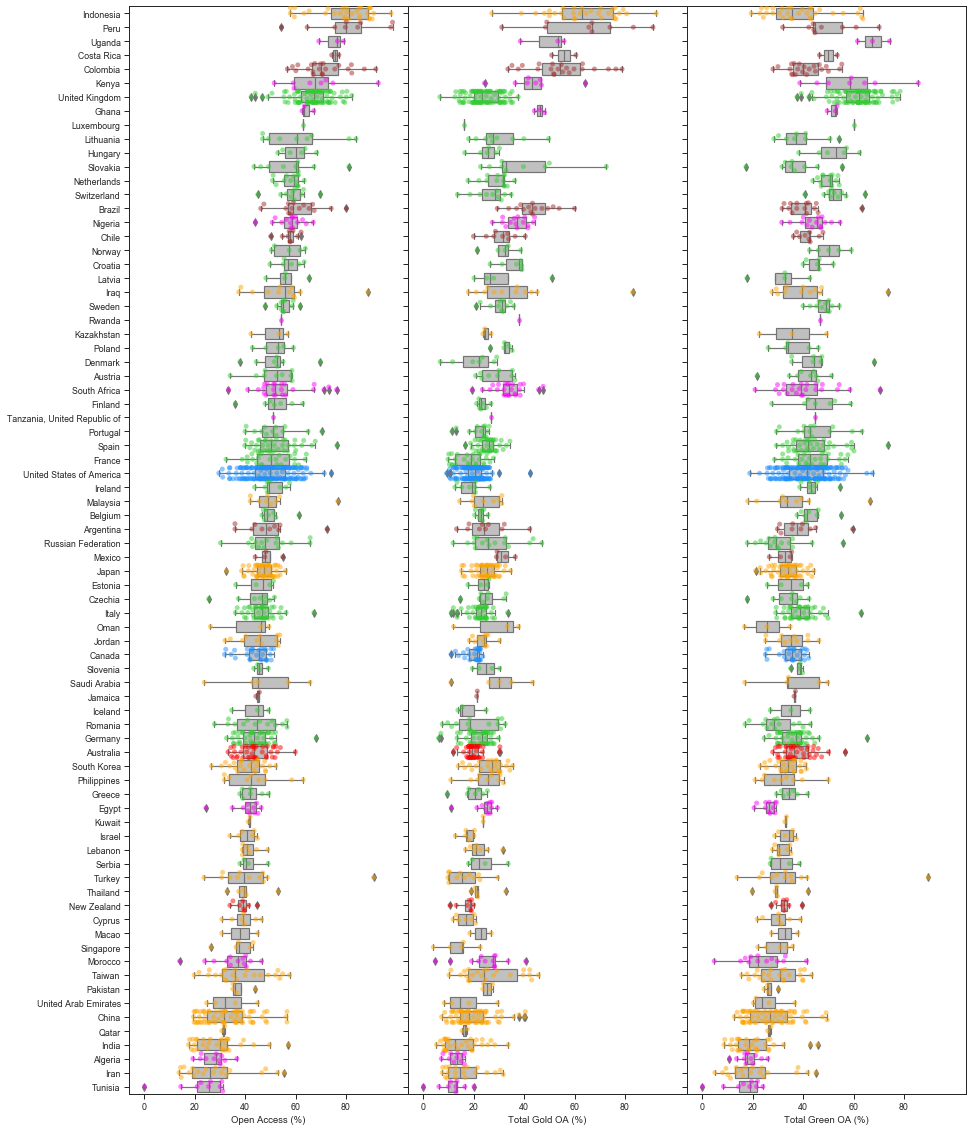

In [9]:
figures4 = charts.BoxScatter(full, 2016, 'country', ['Open Access (%)',
                                                         'Total Gold OA (%)',
                                                         'Total Green OA (%)'])
figures4.process_data()
figures4.plot();

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

#### Supplementary Figure 5: Percentages of institutional Total OA, Gold OA and Green OA (left to right) grouped by countries for 2018

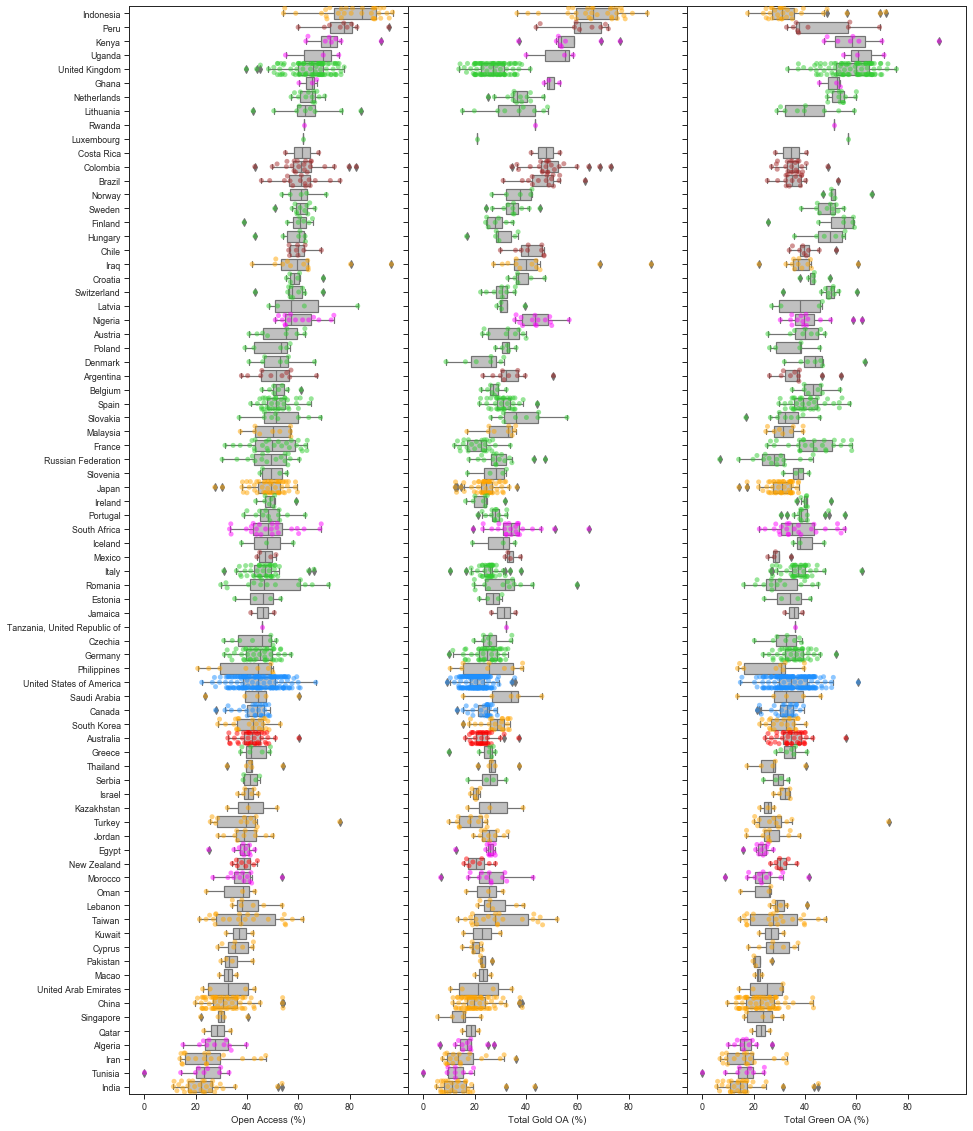

In [10]:
figures5 = charts.BoxScatter(full, 2018, 'country', ['Open Access (%)',
                                                         'Total Gold OA (%)',
                                                         'Total Green OA (%)'])
figures5.process_data()
figures5.plot();

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

#### Supplementary Figure 6: Percentages of institutional Total OA, Gold OA and Green OA (left to right) grouped by regions for 2017

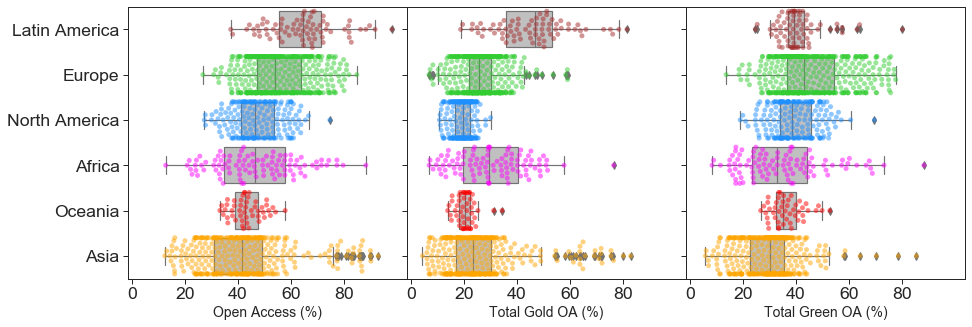

In [11]:
sns.set_context("paper",rc={"legend.fontsize":14,"axes.labelsize":14},font_scale=2)
figures6 = charts.BoxScatter(full, 2017, 'region', ['Open Access (%)',
                                                         'Total Gold OA (%)',
                                                         'Total Green OA (%)'])
figures6.process_data()
figures6.plot(figsize=(15,5));

#### Supplementary Figure 7: Percentages of institutional Total OA, Gold OA and Green OA (left to right) grouped by regions for 2018

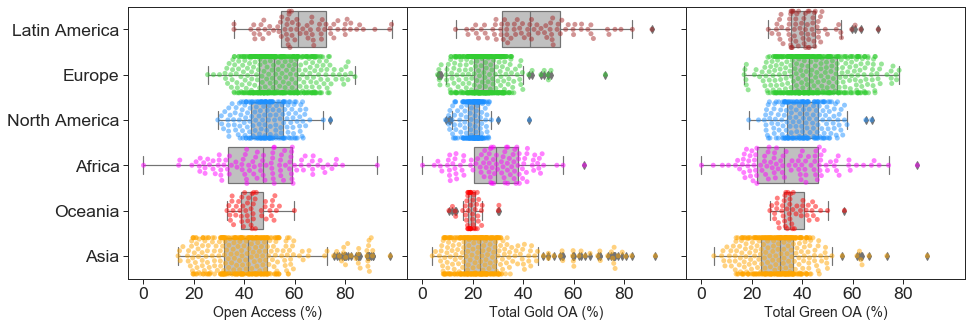

In [12]:
figures7 = charts.BoxScatter(full, 2016, 'region', ['Open Access (%)',
                                                         'Total Gold OA (%)',
                                                         'Total Green OA (%)'])
figures7.process_data()
figures7.plot(figsize=(15,5));

#### Supplementary Figure 8: Percentages of institutional Total OA, Gold OA and Green OA (left to right) grouped by regions for 2016

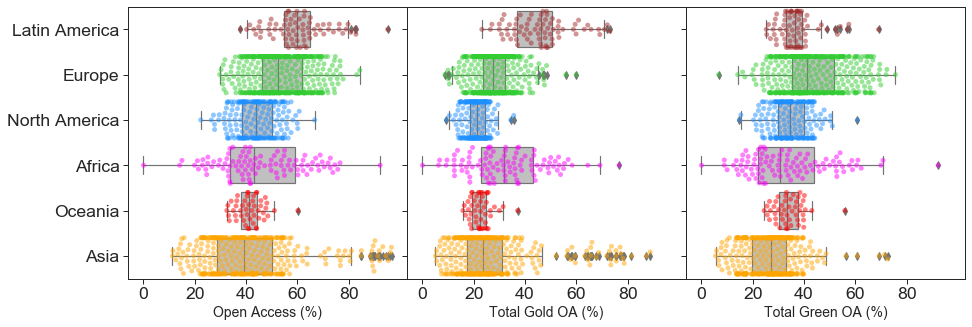

In [13]:
figures8 = charts.BoxScatter(full, 2018, 'region', ['Open Access (%)',
                                                         'Total Gold OA (%)',
                                                         'Total Green OA (%)'])
figures8.process_data()
figures8.plot(figsize=(15,5));

#### Supplementary Figure 9: Open access publishing vs repository-mediated open access by institution from 2007-2018

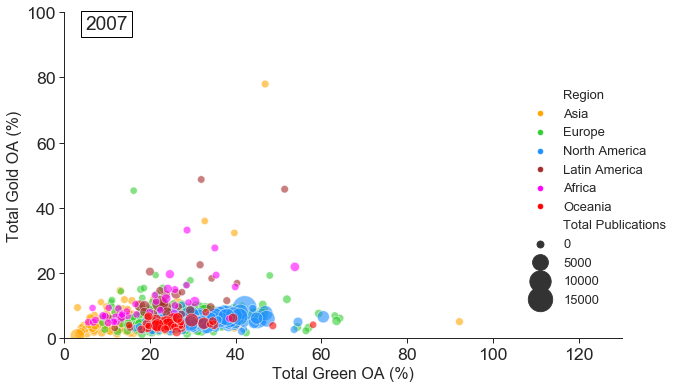

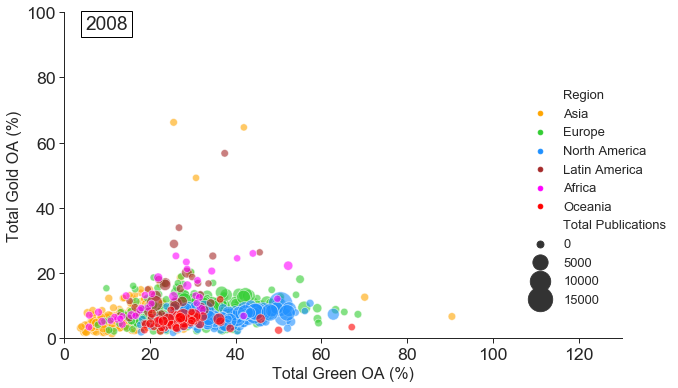

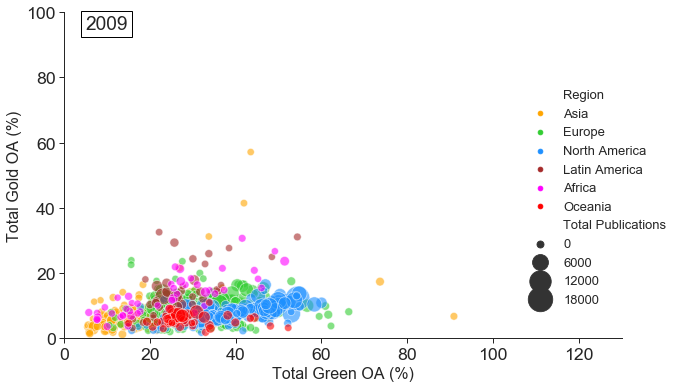

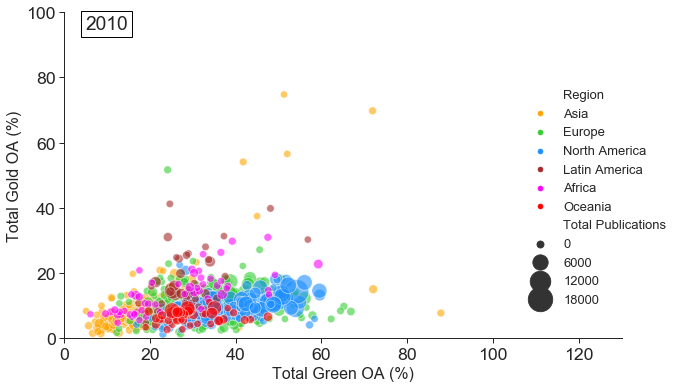

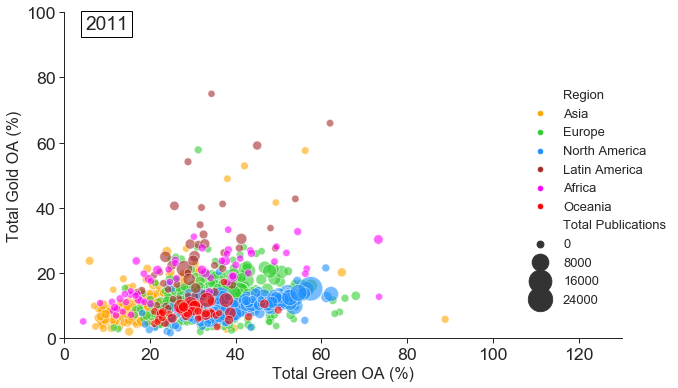

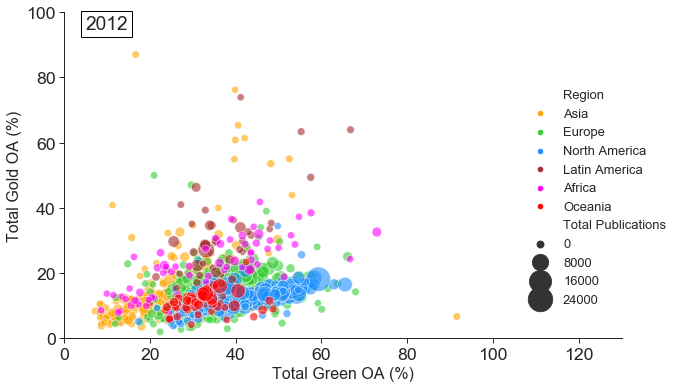

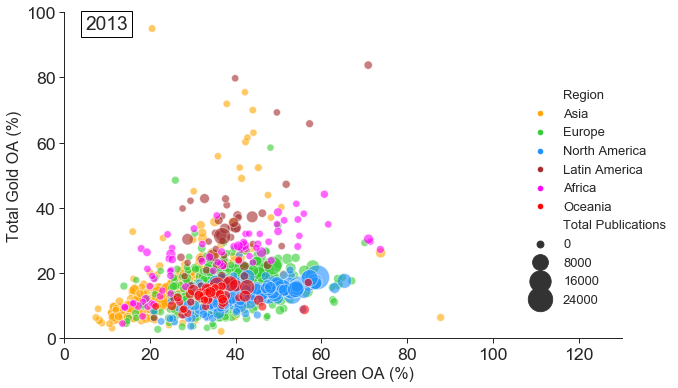

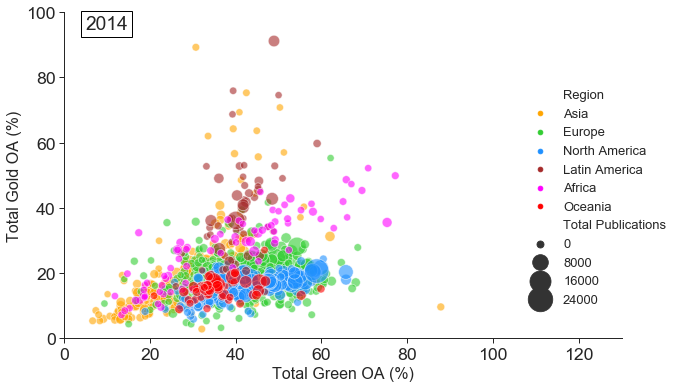

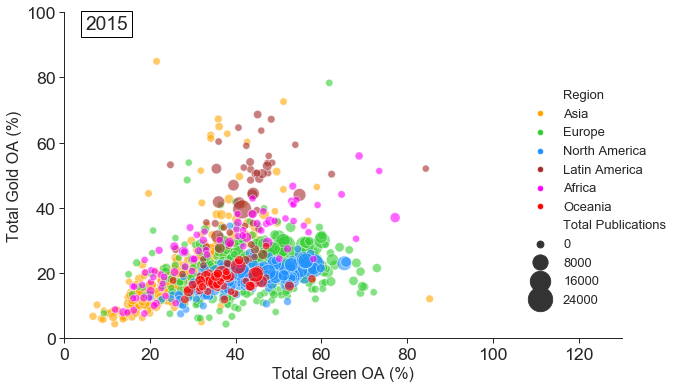

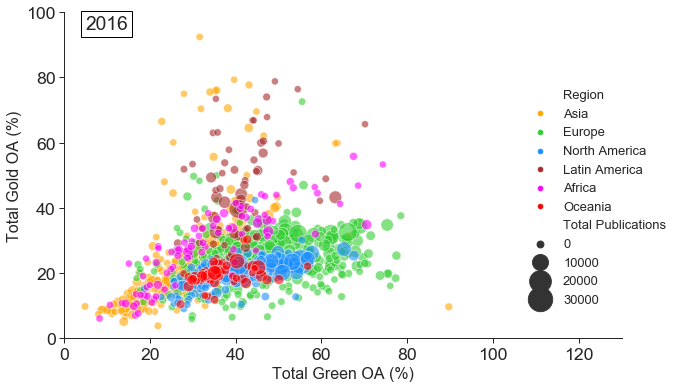

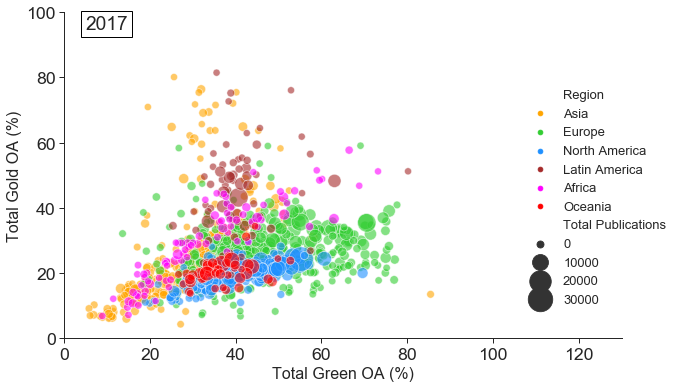

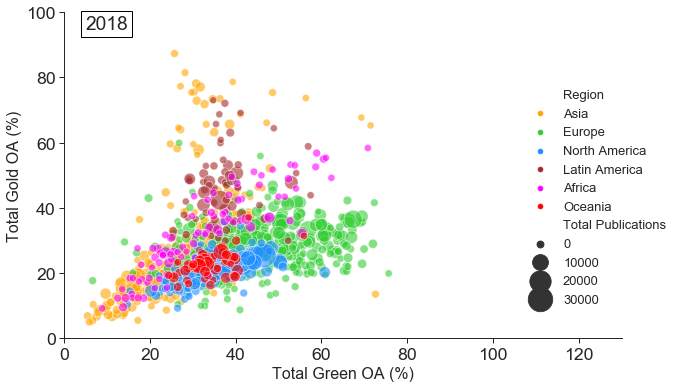

In [14]:
sns.set_context("paper",rc={"legend.fontsize":13,"axes.labelsize":16},font_scale=2)
figdata = full[(full.percent_green_err<17)&
                            (full.total*full.percent_green/100>5)&
                              ((full.total*(1-full.percent_green/100)>5))&
                              (full.percent_gold_err<17)&
                              (full.total*full.percent_gold/100>5)&
                              ((full.total*(1-full.percent_gold/100)>5))&
                              (full.percent_oa_err<17)&
                              (full.total*full.percent_oa/100>5)&
                              ((full.total*(1-full.percent_oa/100)>5))]
for year in range(2007,2019):
    figures9 = charts.ScatterPlot(figdata, 
                                   'Total Green OA (%)', 
                                   'Total Gold OA (%)', 
                                   'Year of Publication', year,
                                   hue_column='Region', 
                                   size_column='Total Publications')
    figures9.process_data()
    figures9.plot(xlim=(0,130), ylim=(0,100), figsize=(10,6))
    plt.text(5, 95, year, bbox=dict(fill=False, edgecolor='black', linewidth=1))


<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

#### Supplementary Figure 10: Additional figures for monitoring the effect of policy interventions for selected groups of universities.

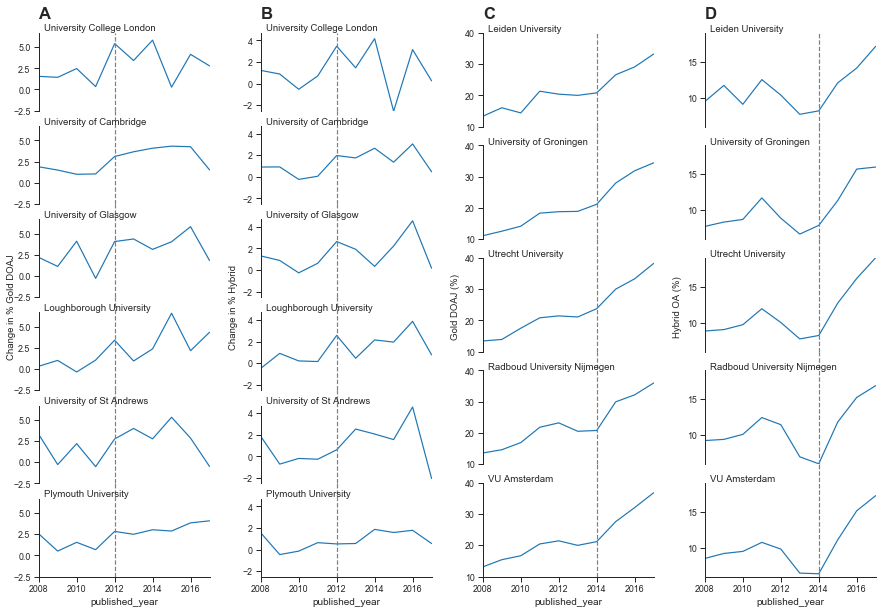

In [15]:
sns.set_context("paper",rc={"legend.fontsize":10,"axes.labelsize":10},font_scale=1)

named = named.sort_values(['grid_id', 'published_year'])
named['Change in % Gold'] = named.percent_gold.diff()
named['Change in % Gold DOAJ'] = named.percent_gold_just_doaj.diff()
named['Change in % Hybrid'] = named.percent_hybrid.diff()
plots = [
            {
            'year_range': (2008,2018),
            'unis': [
                'grid.83440.3b', # University College London 
                'grid.5335.0', # University of Cambridge 
                'grid.8756.c', # University of Glasgow
                'grid.6571.5', # Loughborough University
                'grid.11914.3c', # University of St Andrews
                'grid.11201.33', #Plymouth University
                    ],
            'y_column': 'Change in % Gold DOAJ',
            'markerline' : 2012
            },
            {
            'year_range': (2008,2018),
            'unis': [
                'grid.83440.3b', # University College London 
                'grid.5335.0', # University of Cambridge 
                'grid.8756.c', # University of Glasgow
                'grid.6571.5', # Loughborough University
                'grid.11914.3c', # University of St Andrews
                'grid.11201.33', #Plymouth University
                    ],
            'y_column': 'Change in % Hybrid',
            'markerline' : 2012
            },
            {
            'year_range': (2008,2018),
            'unis': [    
                'grid.5132.5', # Leiden University
                'grid.4830.f', # University of Groningen
                'grid.5477.1', # Utrecht University
                'grid.5590.9', # Radboud University Nijmegen
                'grid.12380.38', # VU University Amsterdam
                #'grid.6852.9', # Eindhoven University of Technology
                    ],
            'y_column' : 'Gold DOAJ (%)',
            'markerline' : 2014
            },
            {
            'year_range': (2008,2018),
            'unis': [    
                'grid.5132.5', # Leiden University
                'grid.4830.f', # University of Groningen
                'grid.5477.1', # Utrecht University
                'grid.5590.9', # Radboud University Nijmegen
                'grid.12380.38', # VU University Amsterdam
                #'grid.6852.9', # Eindhoven University of Technology
                    ],
            'y_column' : 'Hybrid OA (%)',
            'markerline' : 2014
            }
]
figure10 = charts.TimePlotLayout(named, plots)
figure10.process_data()
fig = figure10.plot(figsize=(15,10), 
             wspace=0.3, 
             ylabel_adjustment=0.025, 
             panel_labels=True, 
             panellable_adjustment=0.02)

axes = fig.axes
for ax in axes[0:6]:
    ax.set_ylim(-2.5,6.7)
for ax in axes[6:12]:
    ax.set_ylim(-2.5,4.7)
for ax in axes[12:17]:
    ax.set_ylim(10,40)
for ax in axes[17:23]:
    ax.set_ylim(6,19)